# celda 1:

 importamos librerias

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# celda 2

En el código siguiente, se realiza la descarga y extracción de un conjunto de datos de imágenes de gatos y perros, seguido de la configuración de las rutas de directorios y la obtención de estadísticas sobre los archivos:

1. **Descarga y Extracción**: Se utiliza `wget` para descargar un archivo ZIP que contiene el conjunto de datos de imágenes de gatos y perros. Luego, se descomprime el archivo usando `unzip`.

2. **Definición de Rutas**: Se establecen las rutas para los directorios de entrenamiento, validación y prueba, que se encuentran dentro del directorio principal `cats_and_dogs`.

3. **Conteo de Archivos**: Se cuenta el número total de archivos en los directorios de entrenamiento y validación, así como el número de archivos en el directorio de prueba. El conteo para los directorios de entrenamiento y validación se realiza sumando el número de archivos en sus respectivas subcarpetas "dogs" y "cats".

4. **Configuración de Parámetros**: Se definen las variables para el preprocesamiento y el entrenamiento del modelo, incluyendo el tamaño del lote (`batch_size`), el número de épocas (`epochs`), y las dimensiones de las imágenes (`IMG_HEIGHT` y `IMG_WIDTH`).

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOS

## celda 3
En el código, hemos configurado generadores de datos para el entrenamiento, la validación y la prueba de un modelo de aprendizaje profundo. Cada generador se encarga de procesar las imágenes y ajustarlas al formato requerido por el modelo. Los generadores de entrenamiento y validación normalizan las imágenes para mejorar la eficiencia del modelo, mientras que el generador de prueba gestiona las imágenes de una única carpeta, sin mezclar ni barajar los datos. Estos generadores permiten que el modelo se entrene, valide y evalúe de manera sistemática y organizada.

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)
# batch_size = 128
# epochs = 15
# IMG_HEIGHT = 150
# IMG_WIDTH = 150
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                            directory=train_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                            directory=validation_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                            directory=PATH, classes=['test'], # dado que tenemos una carpeta sola sin subdirectorios
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            class_mode="input", shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## celda 4
En el código siguiente, se define una función `plotImages` para visualizar imágenes y sus probabilidades asociadas, si se proporciona. La función crea una serie de subgráficas, una para cada imagen en el arreglo `images_arr`. Si no se especifican probabilidades, simplemente muestra las imágenes. Si se incluyen probabilidades, la función añade un título a cada subgráfica que indica la probabilidad de que la imagen pertenezca a una categoría específica (por ejemplo, "perro" o "gato"), basándose en un umbral de 0.5. Finalmente, se utiliza esta función para mostrar un conjunto de imágenes de entrenamiento, permitiendo una inspección visual de las primeras cinco imágenes del lote.


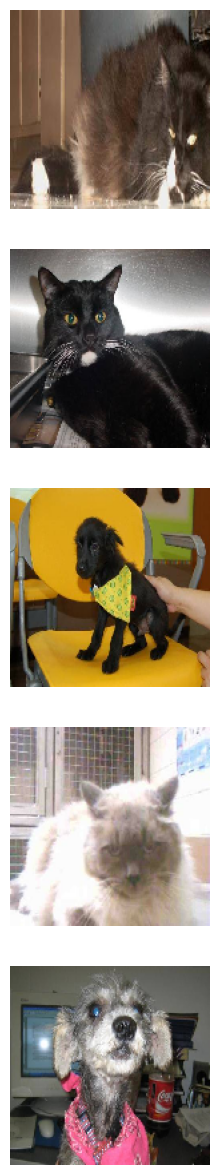

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


## celda 5: data augmentation
En el código, se configura un generador de datos de imágenes para el entrenamiento que incluye varias técnicas de aumento de datos. Estas técnicas son utilizadas para mejorar la generalización del modelo al introducir variabilidad en las imágenes de entrenamiento. Las transformaciones aplicadas incluyen:

- **Normalización de píxeles**: Escala los valores de los píxeles a un rango de [0, 1].
- **Transformaciones geométricas**: Permite el volteo horizontal y vertical de las imágenes, así como desplazamientos horizontales y verticales.
- **Zoom y corte**: Aplica un rango de zoom y deformación a las imágenes para simular diferentes perspectivas y ángulos.
- **Rango de cizallamiento**: Introduce variaciones en el ángulo de las imágenes para mejorar la robustez del modelo frente a distorsiones.

Estas técnicas ayudan a crear un conjunto de datos de entrenamiento más diverso, lo que puede contribuir a un modelo más robusto y capaz de **generalizar** mejor en datos no vistos.

In [ ]:
# 5
train_image_generator = ImageDataGenerator(rescale=1/255, fill_mode="nearest",
                                           horizontal_flip=True, vertical_flip=True,
                                           width_shift_range=0.3, height_shift_range=0.3,
                                           zoom_range=0.25, shear_range=0.25)


# celda 6

En el código, se configura un generador de datos de imágenes para el entrenamiento que incluye varias técnicas de aumento de datos. Estas técnicas son utilizadas para mejorar la generalización del modelo al introducir variabilidad en las imágenes de entrenamiento. Las transformaciones aplicadas incluyen:

- **Normalización de píxeles**: Escala los valores de los píxeles a un rango de [0, 1].
- **Transformaciones geométricas**: Permite el volteo horizontal y vertical de las imágenes, así como desplazamientos horizontales y verticales.
- **Zoom y corte**: Aplica un rango de zoom y deformación a las imágenes para simular diferentes perspectivas y ángulos.
- **Rango de cizallamiento**: Introduce variaciones en el ángulo de las imágenes para mejorar la robustez del modelo frente a distorsiones.

Estas técnicas ayudan a crear un conjunto de datos de entrenamiento más diverso, lo que puede contribuir a un modelo más robusto y capaz de generalizar mejor en datos no vistos.

Found 2000 images belonging to 2 classes.


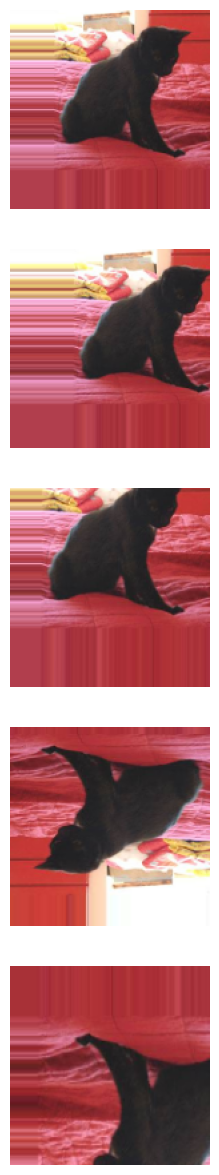

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

# celda 7: definimos el modelo

En el código siguiente, se define una arquitectura de red neuronal convolucional (CNN) utilizando la clase `Sequential` de Keras. El modelo está diseñado para procesar imágenes con un tamaño de entrada de 150x150 píxeles y 3 canales (RGB). La estructura del modelo incluye:

1. **Capas Convolucionales**: Tres capas `Conv2D` con 32, 64 y 128 filtros, respectivamente, cada una seguida de una capa de `MaxPooling2D` para reducir la dimensionalidad espacial de las imágenes. Las capas convolucionales utilizan la función de activación ReLU para introducir no linealidades en el modelo.

2. **Capa de Aplanamiento**: La capa `Flatten` transforma la salida de las capas convolucionales en un vector unidimensional, preparándola para las capas densas siguientes.

3. **Capas Densas**: Una capa `Dense` con 64 unidades y una capa final `Dense` con 2 unidades. La última capa tiene 2 unidades para clasificar en dos categorías ( "perro" y "gato" ya que se trata de una tarea de clasificación binaria).

4. **Compilación del Modelo**: El modelo se compila utilizando el optimizador Adam y la métrica de precisión (`accuracy`). La función de pérdida utilizada es `SparseCategoricalCrossentropy`, que es adecuada para problemas de clasificación con múltiples clases cuando las etiquetas están en formato entero.

Finalmente, se muestra un resumen de la arquitectura del modelo, que proporciona detalles sobre el número de parámetros y la estructura de cada capa.

In [ ]:
# 7 # + neuronas en las capas conv2d captan mas caracteristicas pero aumentan el riesgo de sobreajuste
# conclusion empirica: no conviene en esta arquitectura utilizar ni capas de  normalizadores de lote(batchnormalization), ni capas de dropout
model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
# model.add(Dense(1))
model.add(Dense(2))
# model.compile(optimizer='adam', metrics=['accuracy'], loss=BinaryCrossentropy(from_logits=True))
model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 17, 17, 128)      

  # celda 8
  En el código, se entrena el modelo utilizando el método `fit` de Keras. Este proceso implica las siguientes acciones:

1. **Entrenamiento del Modelo**: El método `fit` entrena el modelo en el conjunto de datos de entrenamiento (`train_data_gen`), especificando el número de pasos por época (`steps_per_epoch`) como el total de imágenes de entrenamiento dividido por el tamaño del lote.

2. **Validación**: Se proporciona un conjunto de datos de validación (`val_data_gen`) para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. El número de pasos de validación (`validation_steps`) se define como el total de imágenes de validación dividido por el tamaño del lote.

3. **Configuración de Épocas y Verbosidad**: El entrenamiento se realiza durante un número determinado de épocas (`epochs`), y la opción `verbose=1` asegura que se muestre información detallada sobre el progreso del entrenamiento en la consola.

El historial del entrenamiento, almacenado en la variable `history`, contiene datos sobre la pérdida y la precisión del modelo tanto en el entrenamiento como en la validación, lo que permite monitorear el desempeño del modelo a lo largo de las épocas.

In [ ]:
# 8
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1) # en este caso no es buena idea poner un early stopping

Epoch 1/20
15/15 [==============================] - 20s 1s/step - loss: 0.9029 - accuracy: 0.5096 - val_loss: 0.6888 - val_accuracy: 0.5033
Epoch 2/20
15/15 [==============================] - 18s 1s/step - loss: 0.6894 - accuracy: 0.5529 - val_loss: 0.6815 - val_accuracy: 0.6217
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.6830 - accuracy: 0.5540 - val_loss: 0.6745 - val_accuracy: 0.5089
Epoch 4/20
15/15 [==============================] - 17s 1s/step - loss: 0.6729 - accuracy: 0.5577 - val_loss: 0.6431 - val_accuracy: 0.6395
Epoch 5/20
15/15 [==============================] - 19s 1s/step - loss: 0.6581 - accuracy: 0.5780 - val_loss: 0.6406 - val_accuracy: 0.6094
Epoch 6/20
15/15 [==============================] - 16s 1s/step - loss: 0.6572 - accuracy: 0.5913 - val_loss: 0.6449 - val_accuracy: 0.5960
Epoch 7/20
15/15 [==============================] - 18s 1s/step - loss: 0.6505 - accuracy: 0.5929 - val_loss: 0.6709 - val_accuracy: 0.5792
Epoch 8/20
15/15 [==

# celda 9:

En la celda siguiente, se visualizan los resultados del entrenamiento del modelo:

1. **Extracción de Métricas**: Se extraen los datos de precisión (`accuracy` y `val_accuracy`) y pérdida (`loss` y `val_loss`) del historial del entrenamiento (`history.history`), que proporciona la evolución de estas métricas a lo largo de las épocas.

2. **Preparación para la Visualización**: Se define un rango de épocas para el eje x de los gráficos.

3. **Visualización de Resultados**:
   - **Precisión**: Se crea un gráfico de líneas que muestra la precisión de entrenamiento y validación a lo largo de las épocas. Esto ayuda a comparar cómo se desempeña el modelo en datos de entrenamiento frente a datos de validación.
   - **Pérdida**: Se genera un gráfico de líneas similar para la pérdida de entrenamiento y validación, proporcionando una visión sobre cómo disminuye la pérdida durante el entrenamiento y si el modelo está generalizando bien.

4. **Configuración de Gráficos**: Ambos gráficos se colocan en una figura con un tamaño especificado. Se añaden leyendas y títulos para una mejor interpretación de los resultados.

Esta visualización permite evaluar el rendimiento del modelo y detectar posibles problemas, como el sobreajuste, observando las diferencias entre las métricas de entrenamiento y validación.

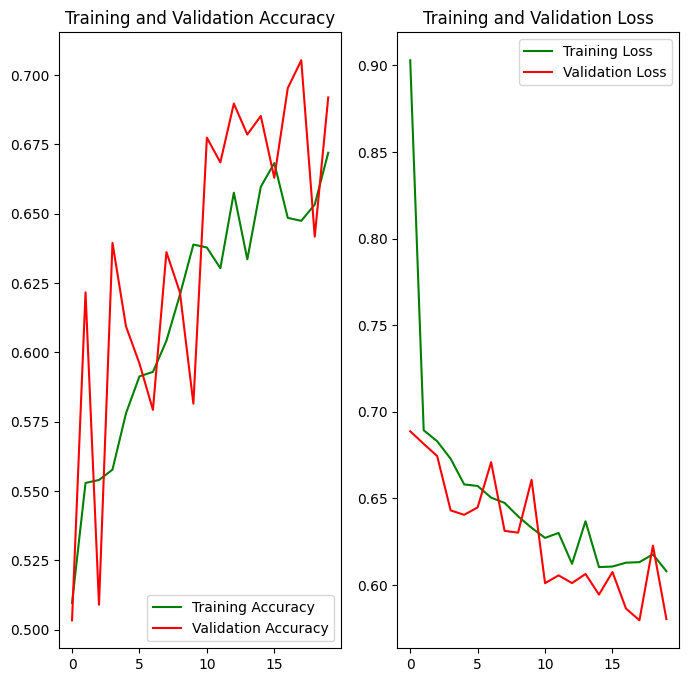

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color = "green")
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color = "red")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color = "green")
plt.plot(epochs_range, val_loss, label='Validation Loss', color = "red")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# celda 10

En el código proporcionado, se evalúa el modelo en el conjunto de datos de prueba y se visualizan los resultados:

1. **Obtención de Imágenes de Prueba**: Se obtiene un lote de imágenes de prueba (`test_images`) usando el generador de datos de prueba (`test_data_gen`).

2. **Predicción de Probabilidades**: Se utilizan las predicciones del modelo para obtener las probabilidades de clase para cada imagen en el conjunto de prueba. `model.predict(test_data_gen)` genera las predicciones, y `np.argmax` se utiliza para seleccionar la clase con la probabilidad más alta para cada imagen.

3. **Visualización**: Se llama a la función `plotImages` para mostrar las imágenes de prueba junto con las probabilidades de las clases predichas. Esto permite visualizar cómo el modelo clasifica cada imagen y observar la certeza de las predicciones.

Esta celda proporciona una forma de inspeccionar visualmente los resultados del modelo y verificar si las predicciones son coherentes con las expectativas.

1/1 [==============================] - 0s 191ms/step


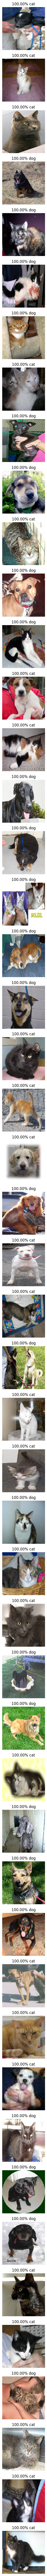

In [ ]:
test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
plotImages(test_images, probabilities=probabilities)

# celda 11

Esta celda evalúa el rendimiento del modelo comparando sus predicciones con respuestas correctas. Calcula el porcentaje de imágenes correctamente clasificadas y determina si el modelo supera el umbral del 63% de precisión. Finalmente, imprime el porcentaje de imágenes correctamente identificadas y si el modelo ha pasado el desafío.

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
